In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
(images, labels), (testX, testY) = mnist.load_data()

images = np.array(images).astype("float").reshape(-1,784) / 255
labels = np.array(labels)
X = images
Y = labels
testX = np.array(testX).astype("float").reshape(-1, 784) / 255
testY= np.array(testY)

testX.shape, testY.shape, X.shape, Y.shape

2023-02-16 10:05:43.597949: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


((10000, 784), (10000,), (60000, 784), (60000,))

In [2]:

images = np.array(images).astype("float") / 255
labels = np.array(labels)
X=images
Y=labels
testX = np.array(testX).astype("float") / 255
testY= np.array(testY)

In [3]:
digits = labels

In [4]:
digits[0:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [5]:
digits = np.array(images)

In [ ]:
digits.shape

In [6]:
p = np.reshape(digits, newshape=( 60000, 28,28))

In [7]:
p.shape

(60000, 28, 28)

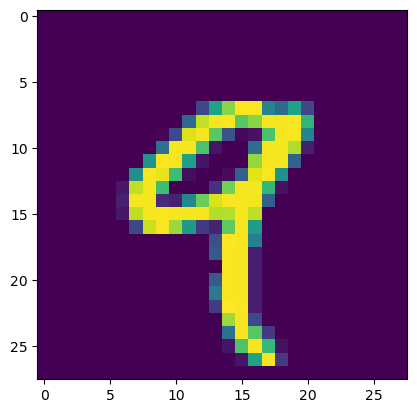

In [8]:
plt.imshow(p[4,::])

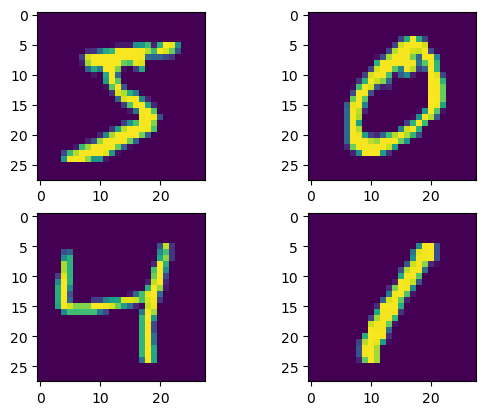

In [9]:
plt.subplot(221)
plt.imshow(p[0,::])
plt.subplot(222)
plt.imshow(p[1,::])
plt.subplot(223)
plt.imshow(p[2,::])
plt.subplot(224)
plt.imshow(p[3,::])
plt.savefig("MNIST.png", dpi=300, bbox_inches="tight")

In [ ]:
X.shape, Y.shape

In [10]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=500)
lr.fit(X, Y)
lr.score(testX, testY)

0.7793

In [11]:
lr

LogisticRegression(max_iter=500)

In [12]:
lr.coef_.shape

(10, 784)

In [13]:
lr.predict_log_proba(testX.reshape((-1,784)))

array([[-2.70242359, -2.49921278, -2.67210392, ..., -1.22259553,
        -2.73588614, -2.11609236],
       [-2.31758479, -2.10403165, -1.87259742, ..., -3.00113358,
        -2.40587695, -2.98871877],
       [-3.03790463, -1.12718883, -2.46901194, ..., -2.37831216,
        -2.64931609, -2.62924818],
       ...,
       [-3.12261685, -2.59565931, -2.63806328, ..., -2.06851973,
        -2.06487967, -1.89341336],
       [-2.47059878, -1.97428487, -2.45891843, ..., -2.27084598,
        -2.15637153, -2.48549637],
       [-1.79470752, -3.18056106, -2.0681407 , ..., -3.21618433,
        -2.78321461, -2.83558232]])

In [14]:
def optim0(image):
    #print(type(image))
    #print(image.shape)
    g=lr.predict_log_proba(X[0,:]+image[np.newaxis,:])
    return(g[0][0])

In [15]:
from scipy.optimize import minimize

init = np.random.random((28,28))
init.shape

(28, 28)

In [ ]:
init_flat = init.reshape((1,-1))[0]
init_flat.shape

In [ ]:
type(init_flat), init_flat.shape

In [ ]:
optim0(init_flat)

In [ ]:
t = minimize(optim0, init_flat)

t

In [ ]:
init0 = np.zeros((28,28)).reshape(-1,1)[0]
optim0(init0)

In [ ]:
t = minimize(optim0, init0)


In [ ]:
t

In [ ]:
plt.imshow(t.x.reshape((28,28)))

In [ ]:
X[0,:]
lr.predict(X[0,:].reshape(1,-1))

In [ ]:
lr.predict((t.x+X[0,:]).reshape(1,-1))

In [16]:
crange = np.exp(np.arange( - 9, 9, 2))
fits = []
for c in crange:
    print(c)
    fits.append(LogisticRegression(C=c, max_iter=100, penalty="l2", solver="liblinear").fit(X, Y))
accuracy = [f.score(testX, testY) for f in fits]

0.00012340980408667956
0.0009118819655545162
0.006737946999085467
0.049787068367863944
0.36787944117144233
2.718281828459045
20.085536923187668
148.4131591025766
1096.6331584284585


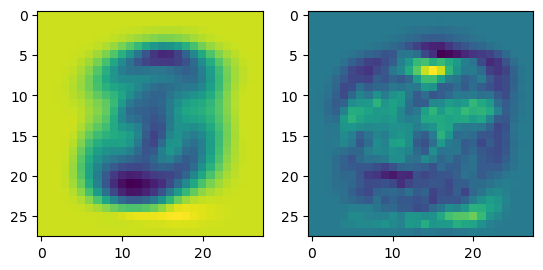

In [17]:
# Let us compare a highly regularized set of linear regression 
# coefficients with a almost-unregularized set.

plt.subplot(1,2,1)
plt.imshow(fits[0].coef_[9,:].reshape((28,28)))
plt.subplot(1,2,2)
plt.imshow(fits[-1].coef_[9,:].reshape((28,28)))


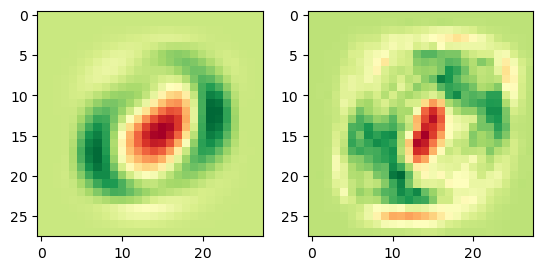

In [18]:
# Maybe a diverging colormap would help us here?

plt.subplot(1,2,1)
plt.imshow(fits[1].coef_[0,:].reshape((28,28)), cmap="RdYlGn")
plt.subplot(1,2,2)
plt.imshow(fits[-1].coef_[0,:].reshape((28,28)), cmap="RdYlGn")

[]

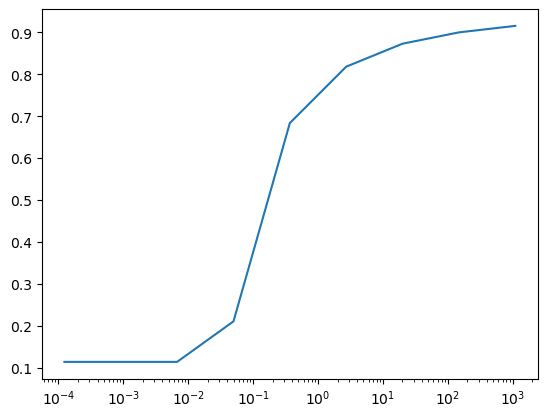

In [19]:
plt.plot(crange, accuracy)
plt.semilogx()

In [20]:
# The regularized parameters should be closer to 0...
plt.hist(fits_l1[-1].coef_[1,:], bins=30)
plt.hist(fits_l1[0].coef_[1,:], bins=30)

NameError: name 'fits_l1' is not defined

In [21]:
# What about L1 regularization?  This will effectively throw
# out pixels that have too little influence on the result.
crange2 = np.power(10.0, np.arange( - 5, 5, 1))
fits_l1 = []
for c in crange2:
    print(c)
    fits_l1.append(LogisticRegression(C=c, max_iter=100, penalty="l1", solver="liblinear").fit(X, Y))
accuracy_l1 = [f.score(testX, testY) for f in fits_l1]


1e-05
0.0001
0.001
0.01
0.1
1.0
10.0
100.0
1000.0
10000.0


Text(0, 0.5, 'Accuracy on holdout set')

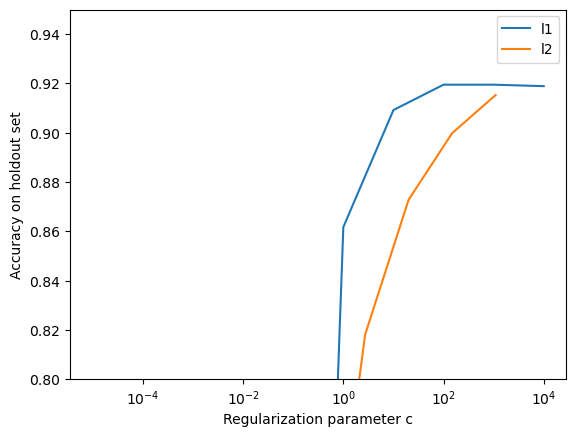

In [22]:
plt.plot(crange2, accuracy_l1, label="l1")
plt.plot(crange, accuracy, label="l2")
plt.semilogx()
plt.ylim((0.8, 0.95))
plt.legend()
plt.xlabel("Regularization parameter c")
plt.ylabel("Accuracy on holdout set")

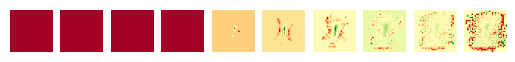

In [23]:
fits=fits_l1
for i in range(len(fits)):
    plt.subplot(1, len(fits), i+1)
    plt.imshow(fits_l1[i].coef_[1,:].reshape((28,28)), cmap="RdYlGn")
   # plt.title("C = {:d}".format(crange2))
    plt.axis("off")

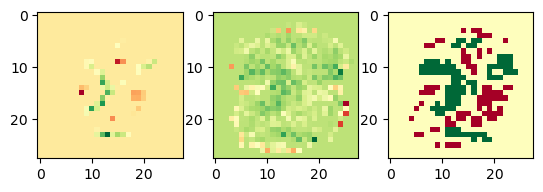

In [27]:
plt.subplot(1,3,1)
plt.imshow(fits_l1[5].coef_[8,:].reshape((28,28)), cmap="RdYlGn")
plt.subplot(1,3,2)
plt.imshow(fits_l1[7].coef_[8,:].reshape((28,28)), cmap="RdYlGn")
plt.subplot(1,3,3)
l=0.03
plt.imshow(np.maximum(-l, np.minimum(l, fits_l1[6].coef_[8,:].reshape((28,28)))), cmap="RdYlGn")

In [28]:
from sklearn.decomposition import TruncatedSVD

In [29]:
svd = TruncatedSVD( 50).fit(X)

In [30]:
svd.explained_variance_ratio_

array([0.05807749, 0.08246405, 0.07095205, 0.06116264, 0.05283004,
       0.04319133, 0.03626566, 0.02910758, 0.02878759, 0.02363035,
       0.02124947, 0.02050351, 0.01716084, 0.0170527 , 0.01590455,
       0.01489269, 0.01363987, 0.01295398, 0.01189454, 0.01152786,
       0.01066264, 0.01006965, 0.00954502, 0.00914597, 0.0088423 ,
       0.00839983, 0.00814284, 0.00786444, 0.00744773, 0.00690985,
       0.00658439, 0.00648344, 0.00602935, 0.00590421, 0.00570132,
       0.00544273, 0.00505781, 0.00487861, 0.00481324, 0.00472603,
       0.00457224, 0.00444666, 0.00419836, 0.00398102, 0.00384787,
       0.00374994, 0.00361909, 0.00350144, 0.00339813, 0.00319652])

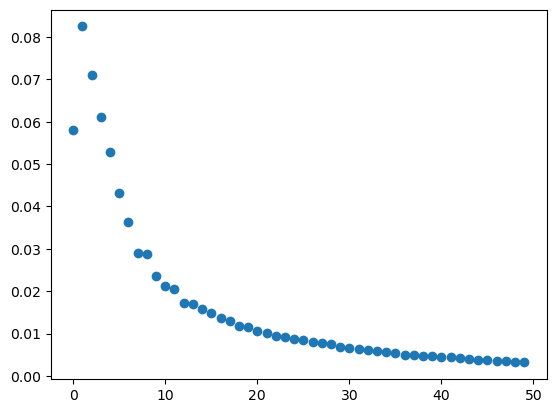

In [31]:
plt.plot(svd.explained_variance_ratio_, 'o')

In [32]:
svd.components_.shape

(50, 784)

/var/folders/mx/y31t86kn4_xbvbmf4k8f7xd00000gp/T/ipykernel_87049/1089844561.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5,5 , i+1)


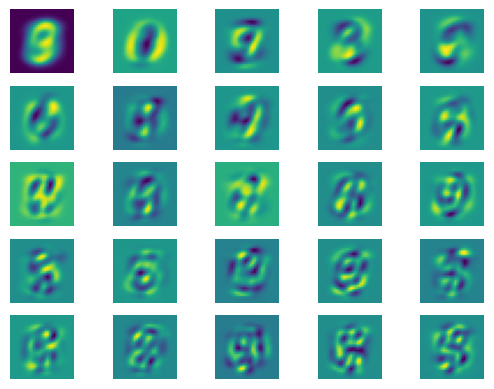

In [33]:
p, a =plt.subplots(1, len(fits))
for i in range(25):
    plt.subplot(5,5 , i+1)
    plt.imshow(svd.components_[i].reshape((28,28)))
    plt.axis("off")

In [34]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
svdreg = TruncatedSVD( 50).fit(scaler.transform(X))

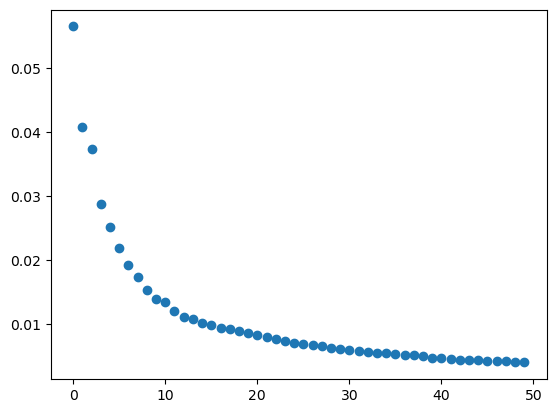

In [35]:
plt.plot(svdreg.explained_variance_ratio_, 'o')

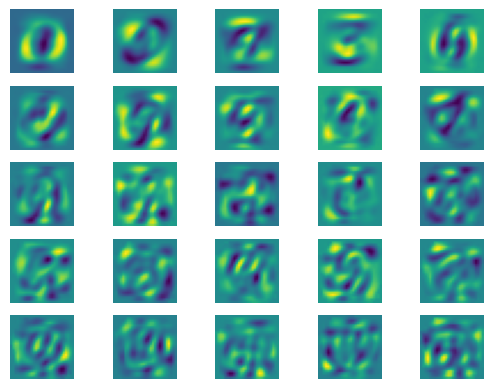

In [36]:
for i in range(25):
    plt.subplot(5,5 , i+1)
    plt.imshow(svdreg.components_[i].reshape((28,28)))
    plt.axis("off")

In [ ]:
# Keep in mind, these are from the variance of the data--no labels
# were used in constructing these vectors.
# And, this procedure is linear in the data; no regularization 
# was applied, just averaging.

In [ ]:
# Now we can project X onto the PCA components; we do 
# this by matrix multiplication

In [37]:
svd.components_.shape

(50, 784)

In [38]:
PC = np.dot( X, svd.components_.T)

In [39]:
PC.shape

(60000, 50)

In [40]:
h = {0: "black", 1:"brown", 2:"red", 3:"orange", 4:"yellow",
    5:"green", 6:"blue", 7:"purple", 8:"grey", 9:"white"}
colorlabels = []
for i,l in enumerate(Y):
    colorlabels.append(h[l])


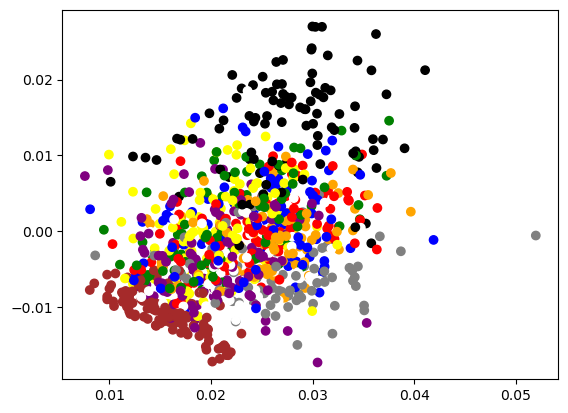

In [42]:
plt.scatter(PC[0:1000,0], PC[0:1000,1] , c= colorlabels[0:1000])

In [ ]:
# Calculate average digits
avgdigit =[]
stddigit =[]
for i in range(10):
    avgdigit.append(images[np.where(labels==i)].mean(axis=0).reshape((28,28)))
    stddigit.append(images[np.where(labels==i)].std(axis=0).reshape((28,28)))
avgdigit=np.array(avgdigit)
avgdigit.shape

In [ ]:
avgdigit_reshape = avgdigit.reshape((10, -1))

In [ ]:
svd_avg = TruncatedSVD(9).fit(scaler.transform(avgdigit_reshape))

In [ ]:
svd_avg.components_.shape

In [ ]:
PC = np.dot(svd_avg.components_, X.T).T

In [ ]:
plt.scatter(PC[0:1000,0], PC[0:1000,1] , c= colorlabels[0:1000])

In [ ]:
plt.scatter(PC[0:1000,2], PC[0:1000,3] , c= colorlabels[0:1000])

In [ ]:
plt.scatter(PC[0:1000,4], PC[0:1000,5] , c= colorlabels[0:1000])